In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


### Import Cleaned Data Set

In [3]:
df = pd.read_csv('Algerian_forest_fires_dataset_CLEAN.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [5]:
## drop month, day and year columns
df.drop(['month', 'day', 'year'], axis=1, inplace=True)

In [6]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [7]:
df['Classes'].value_counts()    

Classes
fire             131
not fire         100
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [8]:
## Encoding the target variable
df["Classes"] = np.where(df["Classes"].str.contains ('not fire'), 0, 1)

In [9]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [10]:
df['Classes'].value_counts()

Classes
1    137
0    105
Name: count, dtype: int64

In [11]:
## Independent and Dependent Features

X = df.drop('FWI', axis=1)
y = df['FWI']
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [12]:
y


0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
237    6.5
238    0.0
239    0.2
240    0.7
241    0.5
Name: FWI, Length: 242, dtype: float64

### Train Test Split

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) 

In [14]:
X_train.shape, X_test.shape

((181, 11), (61, 11))

### Feature Selection Based on Correlation

In [16]:
X_train.corr()  # Correlation based on indepenent features

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.650346,-0.302105,-0.329711,0.703237,0.494261,0.377424,0.617606,0.466352,0.525551,0.249598
RH,-0.650346,1.000000,0.266525,0.234932,-0.634330,-0.413931,-0.246125,-0.693939,-0.364136,-0.435094,-0.364007
Ws,-0.302105,0.266525,1.000000,0.219681,-0.171843,0.000277,0.105115,0.005360,0.038701,-0.059470,-0.235477
Rain,-0.329711,0.234932,0.219681,1.000000,-0.546501,-0.286855,-0.300276,-0.346706,-0.297934,-0.386323,-0.065132
FFMC,0.703237,-0.634330,-0.171843,-0.546501,1.000000,0.621240,0.537884,0.751558,0.610780,0.780805,0.222702
DMC,0.494261,-0.413931,0.000277,-0.286855,0.621240,1.000000,0.876734,0.693404,0.983698,0.613507,0.196778
DC,0.377424,-0.246125,0.105115,-0.300276,0.537884,0.876734,1.000000,0.548992,0.946992,0.546427,-0.081403
ISI,0.617606,-0.693939,0.005360,-0.346706,0.751558,0.693404,0.548992,1.000000,0.659589,0.749722,0.266275
BUI,0.466352,-0.364136,0.038701,-0.297934,0.610780,0.983698,0.946992,0.659589,1.000000,0.609708,0.096607
Classes,0.525551,-0.435094,-0.059470,-0.386323,0.780805,0.613507,0.546427,0.749722,0.609708,1.000000,0.161852


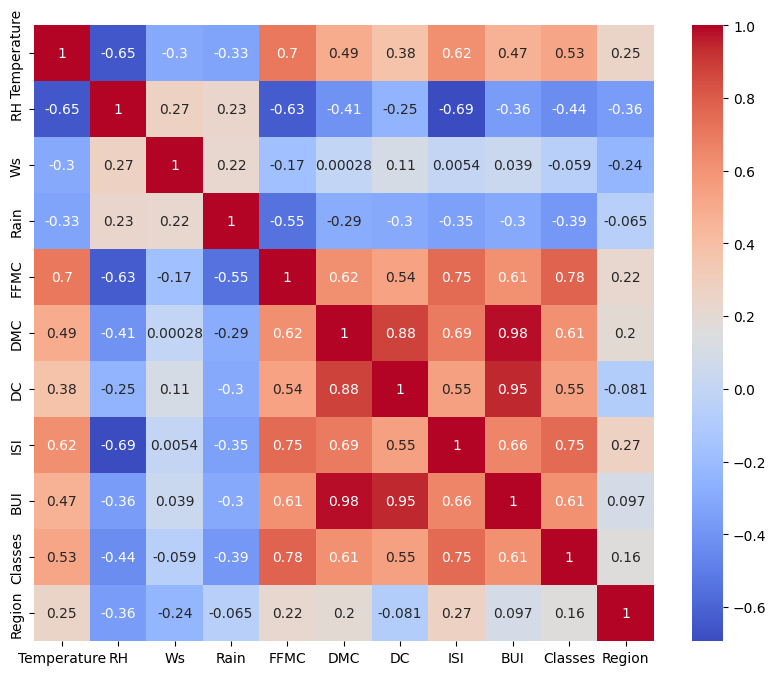

In [17]:
## Check for multicollinearity

plt.figure(figsize=(10, 8))
corr = X_train.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


In [19]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.650346,-0.302105,-0.329711,0.703237,0.494261,0.377424,0.617606,0.466352,0.525551,0.249598
RH,-0.650346,1.000000,0.266525,0.234932,-0.634330,-0.413931,-0.246125,-0.693939,-0.364136,-0.435094,-0.364007
Ws,-0.302105,0.266525,1.000000,0.219681,-0.171843,0.000277,0.105115,0.005360,0.038701,-0.059470,-0.235477
Rain,-0.329711,0.234932,0.219681,1.000000,-0.546501,-0.286855,-0.300276,-0.346706,-0.297934,-0.386323,-0.065132
FFMC,0.703237,-0.634330,-0.171843,-0.546501,1.000000,0.621240,0.537884,0.751558,0.610780,0.780805,0.222702
DMC,0.494261,-0.413931,0.000277,-0.286855,0.621240,1.000000,0.876734,0.693404,0.983698,0.613507,0.196778
DC,0.377424,-0.246125,0.105115,-0.300276,0.537884,0.876734,1.000000,0.548992,0.946992,0.546427,-0.081403
ISI,0.617606,-0.693939,0.005360,-0.346706,0.751558,0.693404,0.548992,1.000000,0.659589,0.749722,0.266275
BUI,0.466352,-0.364136,0.038701,-0.297934,0.610780,0.983698,0.946992,0.659589,1.000000,0.609708,0.096607
Classes,0.525551,-0.435094,-0.059470,-0.386323,0.780805,0.613507,0.546427,0.749722,0.609708,1.000000,0.161852


In [21]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [22]:
## threshold -- Domain Expertise
corr_features = correlation(X_train, 0.850)

In [23]:
corr_features

{'BUI', 'DC'}

##### Drop Features when correlation is more than 0.85

In [24]:
X_train.drop(corr_features, axis=1, inplace=True)
X_test.drop(corr_features, axis=1, inplace=True)


In [25]:
X_train.shape, X_test.shape

((181, 9), (61, 9))

### Feature Scaling or Standardization


In [26]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
#X_train = scalar.fit_transform(X_train)
#X_test = scalar.transform(X_test)

In [27]:
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

In [28]:
type(X_train_scaled)

numpy.ndarray

### Box plot to understand the effects of scaling

Text(0.5, 1.0, 'X_train After Scaling')

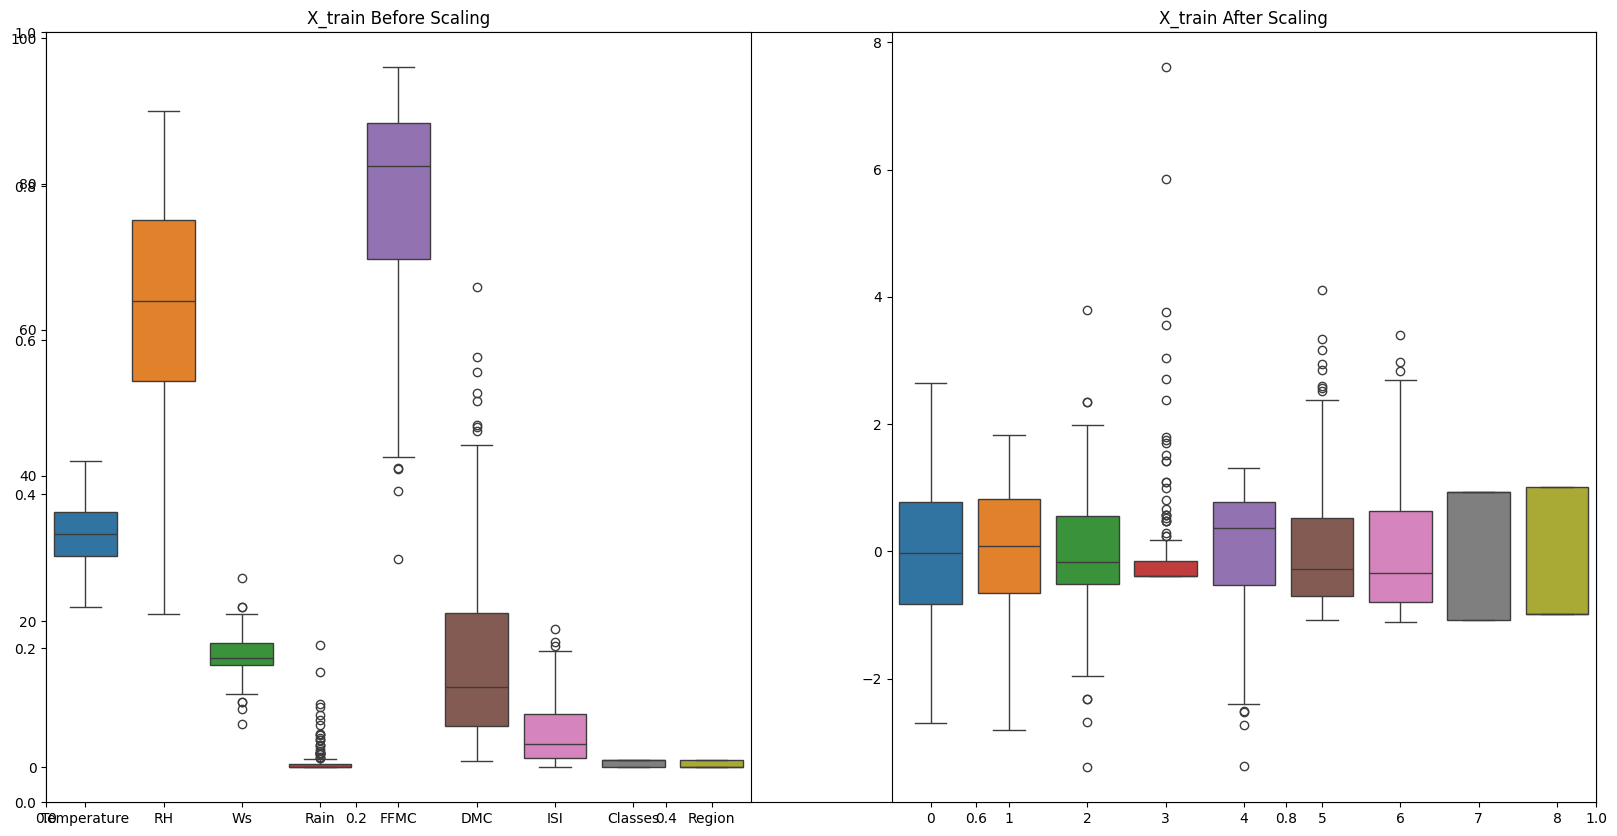

In [29]:
plt.subplots(figsize=(20, 10))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

### Linear Regression Model 

Mean Absolute Error: 0.5838063599546962
Mean Squared Error: 0.8118865325253971
Root Mean Squared Error: 0.901047464080221
R2 Score: 0.983523052949508


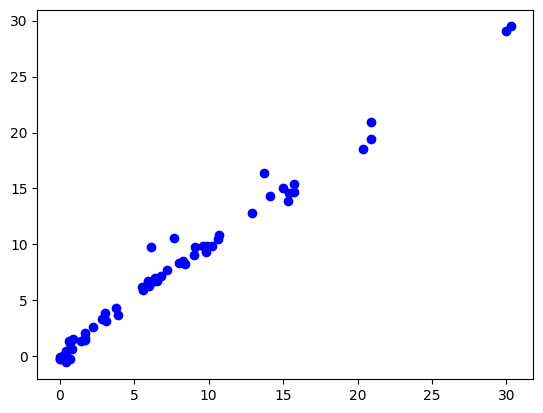

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)
y_pred = linreg.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R2 Score: {r2_score(y_test, y_pred)}')
plt.scatter(y_test, y_pred, c='blue')

# Both y_test and y_pred have a linear relationship, which is good

### Lasso Regression

Mean Absolute Error: 1.145997996939169
Mean Squared Error: 2.4749773383287854
Root Mean Squared Error: 1.5732060698868364
R2 Score: 0.9497712193501187


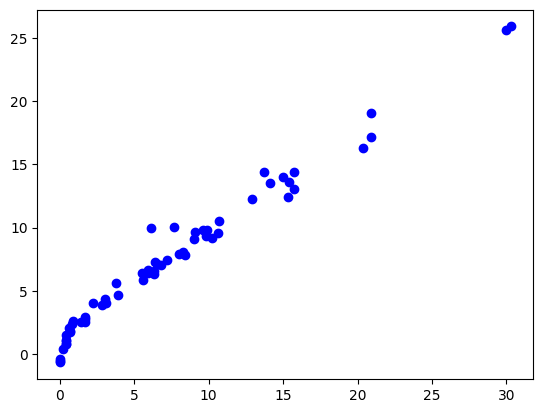

In [31]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R2 Score: {r2_score(y_test, y_pred)}')
plt.scatter(y_test, y_pred, c='blue')


### Lasso CV (Cross Validation) 
use for cross validation

In [32]:
from sklearn.linear_model import LassoCV
lassoCV = LassoCV()
lassoCV.fit(X_train_scaled, y_train)

LassoCV()

In [33]:
LassoCV(cv = 5)

LassoCV(cv=5)

In [34]:
lassoCV.predict(X_test_scaled)

array([ 8.20369611,  7.66752483,  7.01694316,  6.44164095,  6.87995085,
       10.45071211, 10.74749039,  2.94887295,  1.94009643,  3.41796668,
        0.69404823, 10.01585512,  9.38743616, 28.65997022, 18.26984651,
        1.01251376,  4.74458394, -0.7867153 ,  7.31308086,  6.13501941,
        1.94095525,  0.13158713,  6.47046101,  0.12311714, 20.8291544 ,
       14.29840087,  5.91602708,  9.79061958, -0.91287688, 14.94452271,
        6.80932333, -0.34981173, 10.35343136, 14.48678119,  1.68860744,
        3.18803948,  2.11859296,  6.07971374, -0.11535929, -0.44707149,
        6.52025058,  2.00836064,  8.46437828, -0.95269592, 15.34241258,
        8.37687701,  9.90033717,  1.39214078,  0.23289036,  1.21181138,
       29.05538651,  3.74389811, 12.90120028, 19.26121013, 13.68083892,
       16.18966676,  9.89411858,  9.14963522,  3.94107144, 14.42862416,
        9.96684186])

In [35]:
# To see the alpha value that was selected by the LassoCV
lassoCV.alpha_

0.06481103951672902

In [36]:
#TO see all the alpha values that were tested by the LassoCV
lassoCV.alphas_

array([6.94947533, 6.48110395, 6.04429924, 5.6369337 , 5.25702323,
       4.90271746, 4.57229071, 4.26413362, 3.97674529, 3.70872596,
       3.45877025, 3.22566071, 3.00826197, 2.80551518, 2.61643285,
       2.44009403, 2.27563986, 2.12226935, 1.9792355 , 1.84584165,
       1.7214381 , 1.60541894, 1.49721907, 1.39631152, 1.3022048 ,
       1.21444055, 1.13259132, 1.05625846, 0.98507017, 0.91867974,
       0.8567638 , 0.79902079, 0.74516946, 0.69494753, 0.6481104 ,
       0.60442992, 0.56369337, 0.52570232, 0.49027175, 0.45722907,
       0.42641336, 0.39767453, 0.3708726 , 0.34587702, 0.32256607,
       0.3008262 , 0.28055152, 0.26164329, 0.2440094 , 0.22756399,
       0.21222694, 0.19792355, 0.18458417, 0.17214381, 0.16054189,
       0.14972191, 0.13963115, 0.13022048, 0.12144406, 0.11325913,
       0.10562585, 0.09850702, 0.09186797, 0.08567638, 0.07990208,
       0.07451695, 0.06949475, 0.06481104, 0.06044299, 0.05636934,
       0.05257023, 0.04902717, 0.04572291, 0.04264134, 0.03976

In [37]:
# Total number of iterations (5 cross validation * 100 alphas) 500 MSE values
lassoCV.mse_path_

array([[54.83966454, 59.07855795, 38.72729712, 78.24916791, 53.00661707],
       [48.33127443, 52.98238939, 33.40705056, 76.17370919, 47.37592787],
       [42.489492  , 46.9476325 , 28.61641869, 69.11179183, 42.46600092],
       [37.38816074, 41.6222327 , 24.54198449, 62.88571919, 38.18380814],
       [32.93231013, 36.95463498, 21.08421335, 57.39228141, 33.53847098],
       [29.03908563, 32.86149181, 18.15701813, 52.54133041, 29.14966015],
       [25.63631212, 29.27011099, 15.68586523, 48.25410422, 25.34331445],
       [22.66140204, 26.11749884, 13.60632992, 43.16468118, 22.0425561 ],
       [20.05957707, 23.34834079, 11.86266757, 37.9874641 , 19.18168383],
       [17.78321296, 20.91452315, 10.40680285, 33.46741145, 16.70233718],
       [15.79082322, 18.77407566,  9.19714128, 29.52048402, 14.5542223 ],
       [14.0461701 , 16.89025254,  8.19780164, 26.07233474, 12.69363691],
       [12.51796119, 15.23137028,  7.37783328, 23.06047803, 11.08260866],
       [11.17864417, 13.76938633,  6.7

Mean Absolute Error: 0.6701641696301902
Mean Squared Error: 0.9428661398234971
Root Mean Squared Error: 0.9710129452399165
R2 Score: 0.9808648686248684


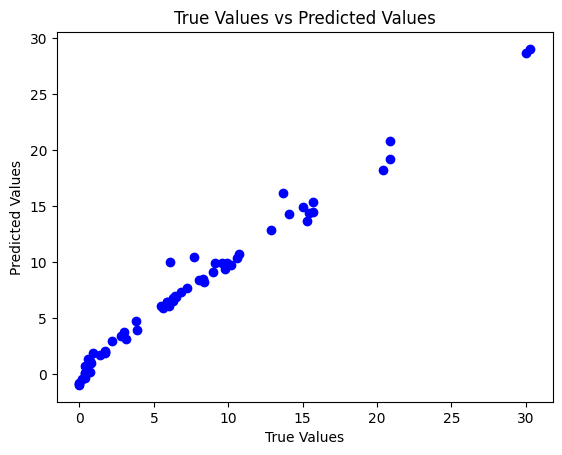

In [38]:
y_pred = lassoCV.predict(X_test_scaled)
plt.scatter(y_test, y_pred, c='blue')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True Values vs Predicted Values')

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R2 Score: {r2_score(y_test, y_pred)}')


### Ridge Regression Model

Mean Absolute Error: 0.6125515638101013
Mean Squared Error: 0.852522760243498
Root Mean Squared Error: 0.9233215909115837
R2 Score: 0.982698355229298


Text(0.5, 1.0, 'True Values vs Predicted Values')

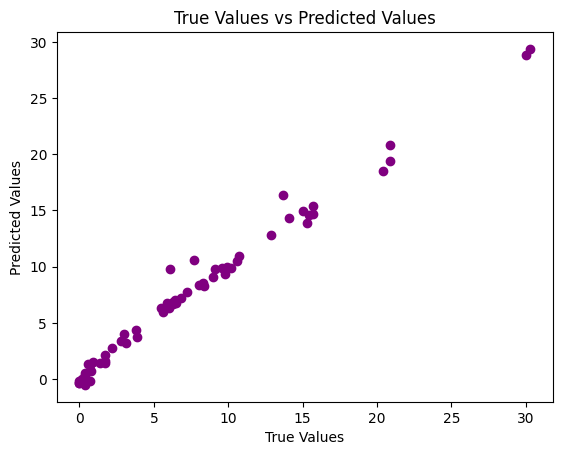

In [61]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

ridge = Ridge()
ridge.fit(X_train_scaled, y_train)

y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R2 Score: {r2_score(y_test, y_pred)}')
plt.scatter(y_test, y_pred, c='purple')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True Values vs Predicted Values')


Mean Absolute Error: 0.8566908888843255
Mean Squared Error: 1.3307545752444485
Root Mean Squared Error: 1.1535833629367445
R2 Score: 0.972992811439674


Text(0.5, 1.0, 'True Values vs Predicted Values')

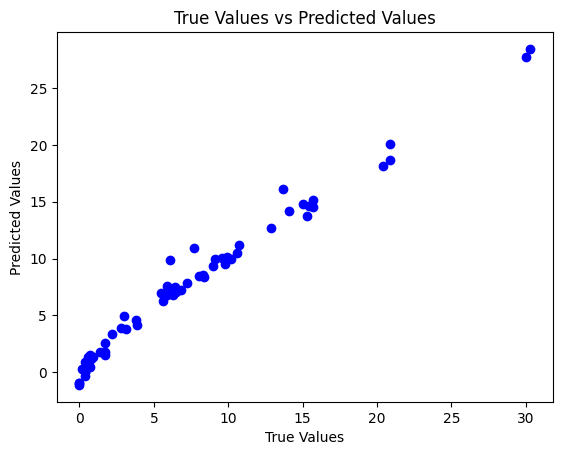

In [62]:
from sklearn.linear_model import RidgeCV
ridgeCV = RidgeCV(cv = 5)
ridgeCV.fit(X_train_scaled, y_train)
y_pred = ridgeCV.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R2 Score: {r2_score(y_test, y_pred)}')
plt.scatter(y_test, y_pred, c='blue')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True Values vs Predicted Values')


In [63]:
ridgeCV.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

### Elastic Net Regression

Mean Absolute Error: 1.8915134363047037
Mean Squared Error: 6.251134059544406
Root Mean Squared Error: 2.500226801621086
R2 Score: 0.8731354681001338


Text(0.5, 1.0, 'True Values vs Predicted Values')

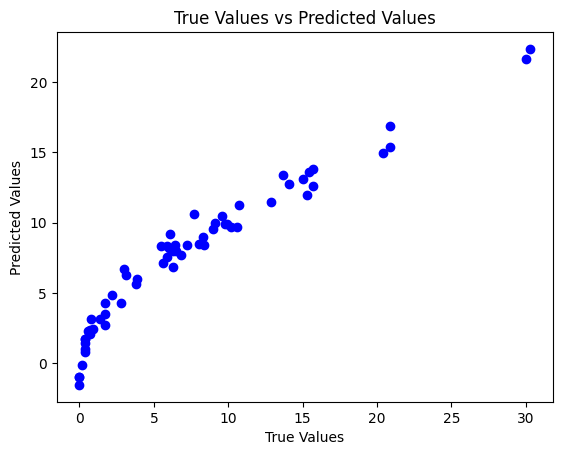

In [64]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

elasticNet = ElasticNet()
elasticNet.fit(X_train_scaled, y_train)
y_pred = elasticNet.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R2 Score: {r2_score(y_test, y_pred)}')
plt.scatter(y_test, y_pred, c='blue')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True Values vs Predicted Values')


Mean Absolute Error: 0.7295307419548663
Mean Squared Error: 1.0380856179275497
Root Mean Squared Error: 1.0188648673536396
R2 Score: 0.9789324233433637


Text(0.5, 1.0, 'True Values vs Predicted Values')

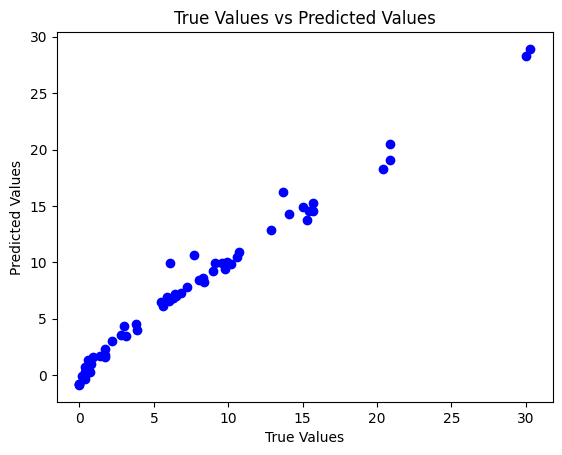

In [65]:
from sklearn.linear_model import ElasticNetCV
elasticNetCV = ElasticNetCV(cv = 5)
elasticNetCV.fit(X_train_scaled, y_train)

y_pred = elasticNetCV.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R2 Score: {r2_score(y_test, y_pred)}')
plt.scatter(y_test, y_pred, c='blue')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True Values vs Predicted Values')

In [66]:
elasticNetCV.alpha_
elasticNetCV.alphas_

array([13.89895066, 12.9622079 , 12.08859847, 11.2738674 , 10.51404647,
        9.80543492,  9.14458143,  8.52826724,  7.95349058,  7.41745193,
        6.9175405 ,  6.45132142,  6.01652395,  5.61103037,  5.2328657 ,
        4.88018807,  4.55127972,  4.2445387 ,  3.958471  ,  3.6916833 ,
        3.44287621,  3.21083787,  2.99443815,  2.79262304,  2.60440959,
        2.4288811 ,  2.26518264,  2.11251691,  1.97014035,  1.83735948,
        1.7135276 ,  1.59804157,  1.49033892,  1.38989507,  1.29622079,
        1.20885985,  1.12738674,  1.05140465,  0.98054349,  0.91445814,
        0.85282672,  0.79534906,  0.74174519,  0.69175405,  0.64513214,
        0.60165239,  0.56110304,  0.52328657,  0.48801881,  0.45512797,
        0.42445387,  0.3958471 ,  0.36916833,  0.34428762,  0.32108379,
        0.29944381,  0.2792623 ,  0.26044096,  0.24288811,  0.22651826,
        0.21125169,  0.19701403,  0.18373595,  0.17135276,  0.15980416,
        0.14903389,  0.13898951,  0.12962208,  0.12088598,  0.11

### Pickle the machine learning models, preprocessing model standardscaler

##### Model we will use { Scalar and ridge }

In [56]:
scalar

StandardScaler()

In [67]:
ridge

Ridge()

In [68]:
import pickle
pickle.dump(scalar, open('scalar.pkl', 'wb'))
pickle.dump(ridge, open('ridge.pkl', 'wb'))
